# Gaia
## Real data!

gully  
Sept 14, 2016

### Outline:

1. More exploring

**Import these first-- I auto import them every time!:**

In [1]:
#! cat /Users/gully/.ipython/profile_default/startup/start.ipy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
from astropy import units as u
from astropy.coordinates import SkyCoord

### 1. Retrieve existing catalogs

Look at Grankin list

In [5]:
d1 = pd.read_csv('../../ApJdataFrames/data/Grankin08/table1_plus.csv') #local version

In [8]:
d1.head(2)

,Name,HBC,SpT,JD_min_max,N_seasons,V_range,N_obs,avgB_V,avgV_R,mult,...,filename_guess,filename,dat_fn,HBC_name,pref_name,RA,DEC,SpT_simbad,Otype_simbad,alt_name
0,Anon 1,366,M0,48953--50760,6,13.58--13.36,96,1.84,1.84,,...,hbc366.dat.gz,hbc366.dat.gz,hbc366.dat,HBC 366,HBC 366,04 13 27.227,+28 16 24.78,M0,BYDra,HBC 366
1,HD 283572,380,G6 IV,48854--53300,13,9.16--8.89,425,0.77,0.70,,...,hd283572.dat.gz,hd283572.dat.gz,hd283572.dat,HBC 380,HD 283572,04 21 58.8471,+28 18 06.505,G5IVe,TTau*,HBC 380


In [9]:
d1.columns

Index(['Name', 'HBC', 'SpT', 'JD_min_max', 'N_seasons', 'V_range', 'N_obs',
       'avgB_V', 'avgV_R', 'mult', 'ref', 'filename_guess', 'filename',
       'dat_fn', 'HBC_name', 'pref_name', 'RA', 'DEC', 'SpT_simbad',
       'Otype_simbad', 'alt_name'],
      dtype='object')

In [10]:
c1 = SkyCoord(d1.RA.values, d1.DEC.values, unit=(u.hourangle, u.deg), frame='icrs')

## 2. Read in the Gaia data

In [11]:
df_list = []

This takes a finite amount of RAM, but should be fine for modern laptops.

In [12]:
for i in range(16):
    df_list.append(pd.read_csv('../data/TgasSource_000-000-{:03d}.csv'.format(i)))

In [13]:
tt = pd.concat(df_list, ignore_index=True)

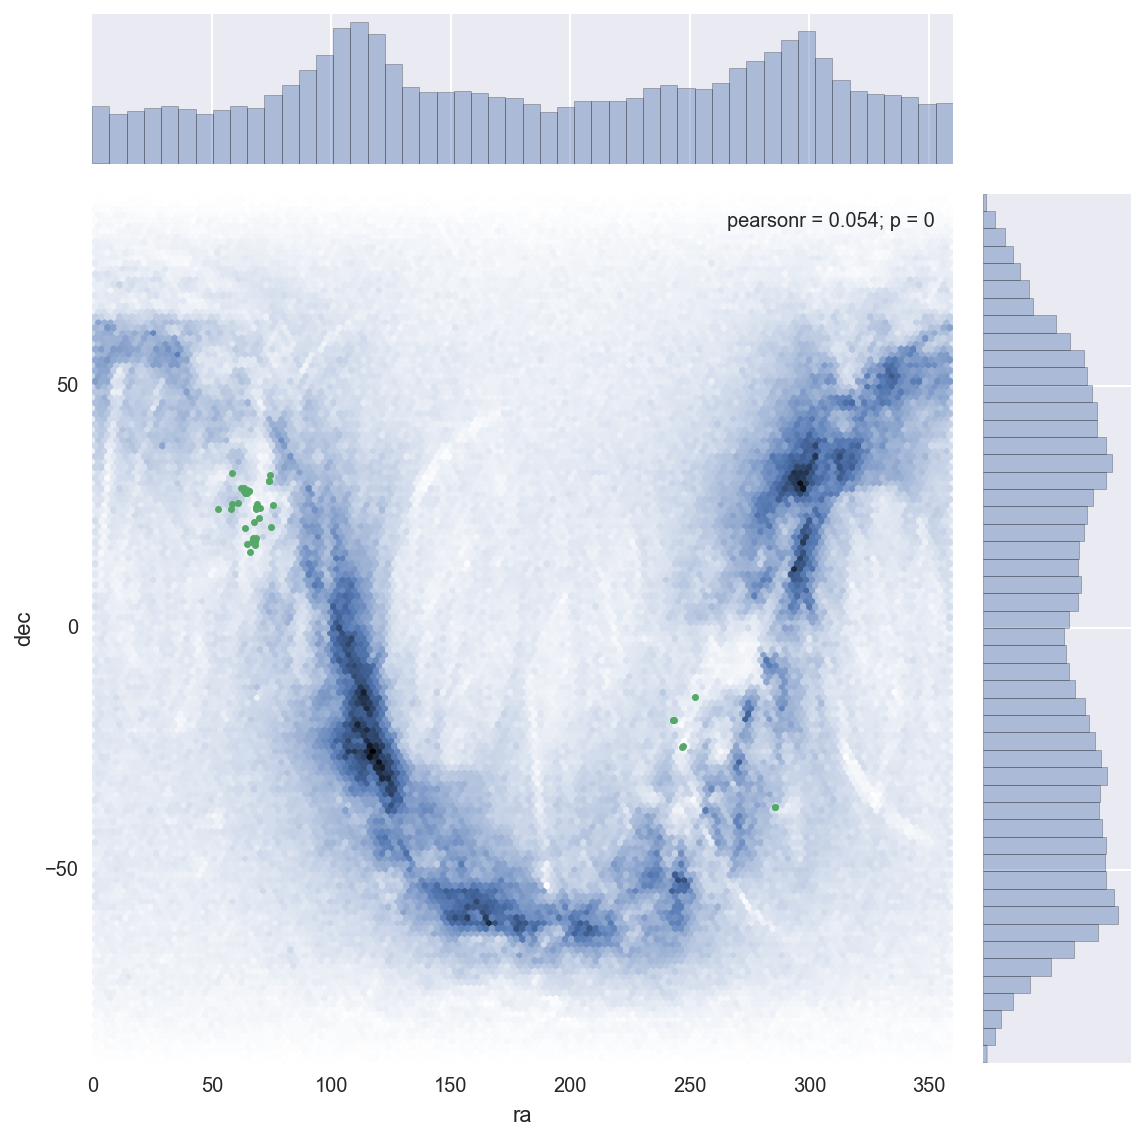

In [15]:
plt.figure(figsize=(10,4))
ax = sns.jointplot(tt.ra, tt.dec, kind='hex', size=8)
ax.ax_joint.plot(c1.ra.deg, c1.dec.deg, '.', alpha=1.0)

In [16]:
cg = SkyCoord(tt.ra.values, tt.dec.values, unit=(u.deg, u.deg), frame='icrs')

## Match

In [17]:
idx, d2d, blah = c1.match_to_catalog_sky(cg)

In [18]:
vec_units = d2d.to(u.arcsecond)
vec = vec_units.value

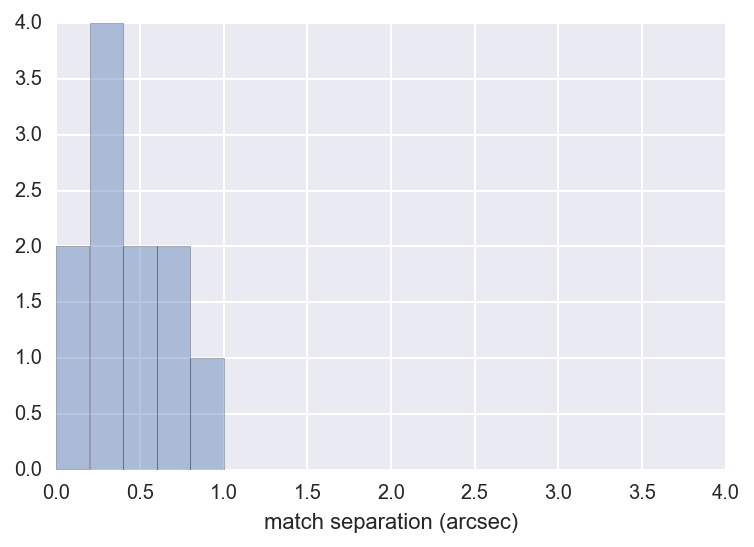

In [20]:
bins = np.arange(0, 4, 0.2)
sns.distplot(vec, bins=bins, kde=False),
plt.xlim(0,4)
plt.xlabel('match separation (arcsec)')

Forced to match to nearest neighbor

In [21]:
len(set(idx)), idx.shape[0]

(39, 48)

... yielding some redundancies in cross matching

In [22]:
tt_sub = tt.iloc[idx]
tt_sub = tt_sub.reset_index()
tt_sub = tt_sub.drop('index', axis=1)

In [23]:
d1 = d1.reset_index()
d1 = d1.drop('index', axis=1)

In [24]:
x1 = pd.concat([d1, tt_sub], axis=1)

In [25]:
x1.shape

(48, 80)

In [26]:
col_order = d1.columns.values.tolist() + tt_sub.columns.values.tolist()
x1 = x1[col_order]
x0 = x1.copy()

In [27]:
x0['xmatch_sep_as'] = vec

In [28]:
x0['Gaia_match'] = vec < 2.0 #Fairly liberal, 1.0 might be better.

//anaconda/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


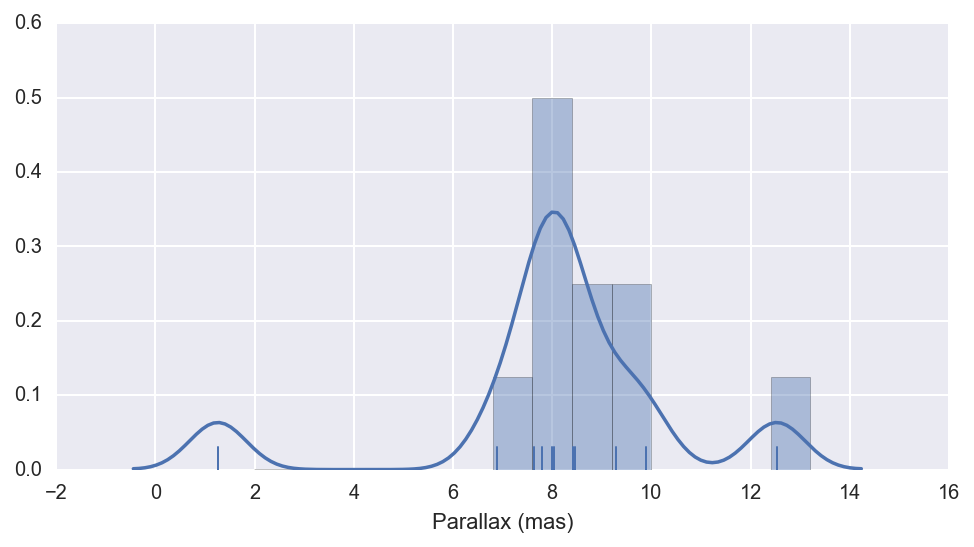

In [33]:
plt.figure(figsize=(8,4))
bins = np.arange(2, 14, 0.8)
sns.distplot(x0.parallax[x0.Gaia_match], bins=bins, rug=True)
#sns.distplot(1.0/(x0.parallax[x0.Gaia_match]/1000.0))
plt.xlabel('Parallax (mas)')
plt.savefig('../results/luhman_mamajek2012.png', dpi=300)

In [34]:
x0.Gaia_match.sum(), len(d1)

(11, 48)

In [37]:
x0.columns

Index(['Name', 'HBC', 'SpT', 'JD_min_max', 'N_seasons', 'V_range', 'N_obs',
       'avgB_V', 'avgV_R', 'mult', 'ref', 'filename_guess', 'filename',
       'dat_fn', 'HBC_name', 'pref_name', 'RA', 'DEC', 'SpT_simbad',
       'Otype_simbad', 'alt_name', 'hip', 'tycho2_id', 'solution_id',
       'source_id', 'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec',
       'dec_error', 'parallax', 'parallax_error', 'pmra', 'pmra_error',
       'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr',
       'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr',
       'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr',
       'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_good_obs_ac',
       'astrometric_n_bad_obs_al', 'astrometric_n_bad_obs_ac',
       'astrometric_delta_q', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_primary_flag',
       'astrometric_relega

In [42]:
x0['dist_pc'] = 1.0/x0['parallax']*1000

In [49]:
x0.shape

(48, 83)

In [45]:
x0[x0.Gaia_match][['Name', 'SpT', 'parallax', 'dist_pc','phot_g_mean_mag', 'N_seasons']]

,Name,SpT,parallax,dist_pc,phot_g_mean_mag,N_seasons
1,HD 283572,G6 IV,7.987188,125.200515,8.740572,13
16,TAP 4,K1,6.891965,145.096493,11.809371,2
22,TAP 35,K1,8.422279,118.732704,9.851185,8
27,TAP 50,K0 IV,12.526775,79.829008,9.890836,12
29,V501 Aur,K2,1.257640,795.139856,9.768918,10
30,V410 Tau,K3,7.784363,128.462667,10.194841,19
36,V1197 Tau,G8,9.289501,107.648413,10.338743,10
37,V1199 Tau,K0,8.455515,118.266003,10.321054,10
38,V1200 Tau,G5,9.897702,101.033553,11.016761,10
39,V1202 Tau,G0,8.037722,124.413353,10.462657,10


11 out of 48 have Gaia parallaxes.

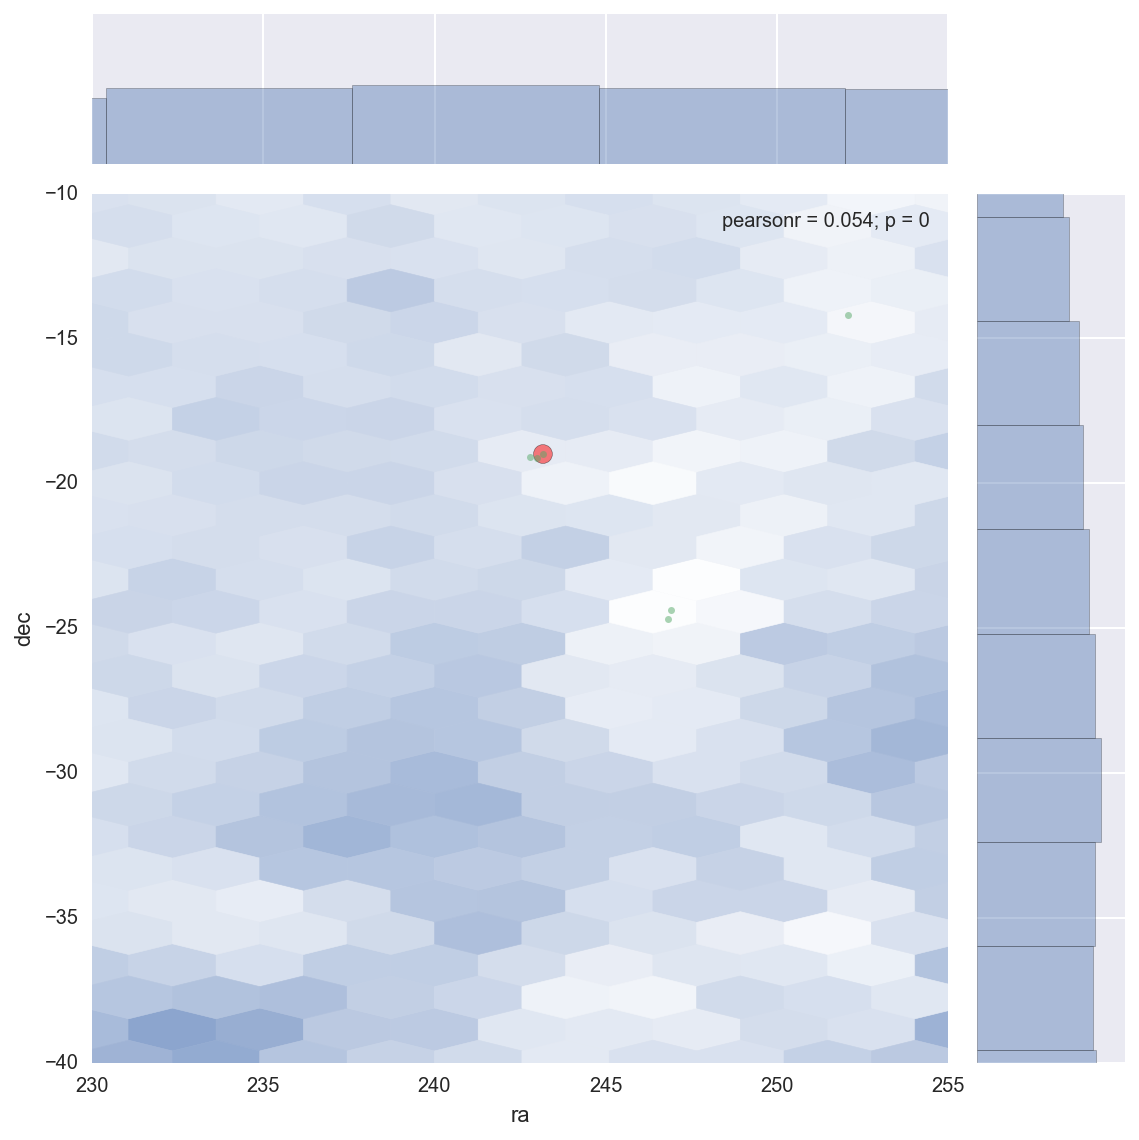

In [50]:
plt.figure(figsize=(10,4))
ax = sns.jointplot(tt.ra, tt.dec, kind='hex', size=8, xlim=(230,255), ylim=(-40,-10))
ax.ax_joint.plot(c1.ra.deg, c1.dec.deg, '.', alpha=0.5)
ax.ax_joint.scatter(x0.ra[x0.Gaia_match], x0.dec[x0.Gaia_match], 
                    s=x0.parallax[x0.Gaia_match]**3*0.2, c='r',alpha=0.5)

Not many Oph Targets from the North.

### The end.